In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-05-06 16:08:45.838798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746547726.081902      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746547726.148329      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

In [24]:
print(data.feature_names)   # List of 8 feature names
print(data.target_names)    # Name of the target variable


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [25]:
import pandas as pd

df = pd.DataFrame(X, columns=data.feature_names)
df['Target'] = y
print(df.head())  # Show first 5 rows


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-06 16:10:41.252229: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [8]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)


# ✅ Make Predictions on Test Data

In [20]:
# Make predictions
y_pred = model.predict(X_test_scaled)
# Compare a few predictions
for i in range(30):
    print(f"Actual: {y_test[i]:.3f} — Predicted: {y_pred[i][0]:.3f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step
Actual: 0.477 — Predicted: 0.477
Actual: 0.458 — Predicted: 0.833
Actual: 5.000 — Predicted: 4.715
Actual: 2.186 — Predicted: 2.508
Actual: 2.780 — Predicted: 2.903
Actual: 1.587 — Predicted: 1.603
Actual: 1.982 — Predicted: 2.462
Actual: 1.575 — Predicted: 1.669
Actual: 3.400 — Predicted: 2.402
Actual: 4.466 — Predicted: 4.692
Actual: 1.232 — Predicted: 1.144
Actual: 2.539 — Predicted: 1.816
Actual: 2.151 — Predicted: 1.440
Actual: 2.205 — Predicted: 1.937
Actual: 2.198 — Predicted: 2.373
Actual: 1.362 — Predicted: 1.407
Actual: 1.784 — Predicted: 1.865
Actual: 1.875 — Predicted: 1.365
Actual: 1.398 — Predicted: 1.693
Actual: 1.375 — Predicted: 1.136
Actual: 4.250 — Predicted: 4.387
Actual: 4.056 — Predicted: 3.590
Actual: 1.388 — Predicted: 1.387
Actual: 5.000 — Predicted: 4.002
Actual: 1.621 — Predicted: 1.601
Actual: 0.514 — Predicted: 0.567
Actual: 1.513 — Predicted: 2.130
Actual: 0.948 — Predicted: 0.989
Actual: 2.041 — Predicted: 1.693


In [21]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.2757
R² Score: 0.7896


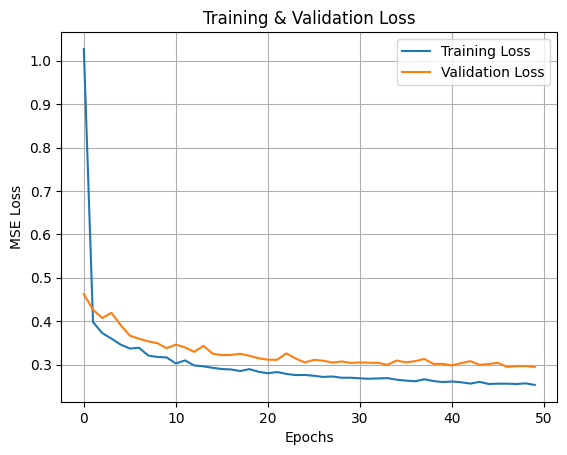

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


# ✅ Predict on New Input

In [19]:
# Example custom input [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
new_sample = np.array([[8.3, 30, 6.0, 1.0, 500, 2.5, 37.0, -122.0]])
new_sample_scaled = scaler.transform(new_sample)
predicted_value = model.predict(new_sample_scaled)
print(f"Predicted Median House Price: {predicted_value[0][0]:.3f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Median House Price: 4.532
